In [1]:
# Import necessary packages
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr

import earthpy as et

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [2]:
# Get data and set working directory
data_path = et.data.get_data("colorado-flood")
os.chdir(os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data'
))

In [3]:
# Define relative path to file
dem_pre_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "pre-flood",
    "lidar",
    "pre_DTM.tif"
)

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr


<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028234663852886e+38
    scale_factor:  1.0
    add_offset:    0.0

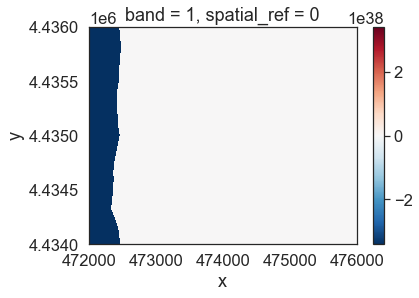

In [4]:
dtm_pre_arr.plot()
plt.show()

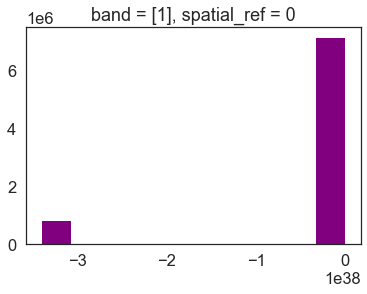

In [5]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
dtm_pre_arr.plot.hist(color="purple")
plt.show()

In [6]:
print("the minimum raster value is: ", np.nanmin(dtm_pre_arr.values))
print("the maximum raster value is: ", np.nanmax(dtm_pre_arr.values))

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


In [7]:
# Open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

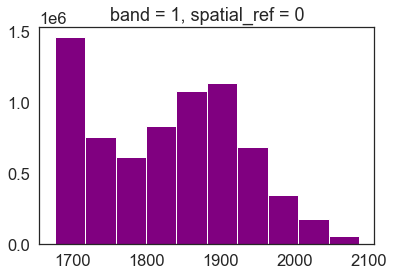

In [8]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
dtm_pre_arr.plot.hist(color="purple")
plt.show()

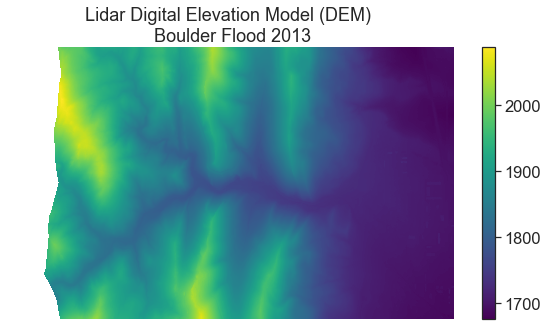

In [13]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(
    # cmap="Greys_r",
    # ax=ax,
)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()


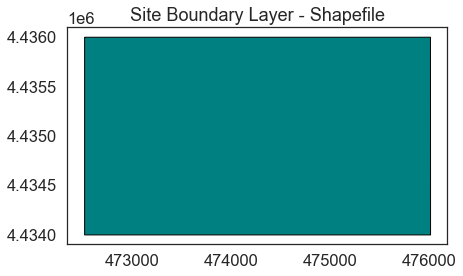

In [14]:
# Open site boundary vector layer
site_bound_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "clip-extent.shp",
)
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
f, ax = plt.subplots(figsize=(8, 4))
site_bound_shp.plot(
    color='teal',
    edgecolor='black',
    ax=ax,
)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()


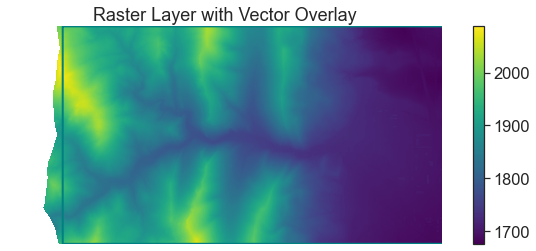

In [20]:
f, ax = plt.subplots(figsize=(11, 4))

dtm_pre_arr.plot(
    cmap="viridis",
    ax=ax,
)
site_bound_shp.plot(
    color='None',
    edgecolor='teal',
    linewidth=2,
    ax=ax,
    zorder=4,
)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()


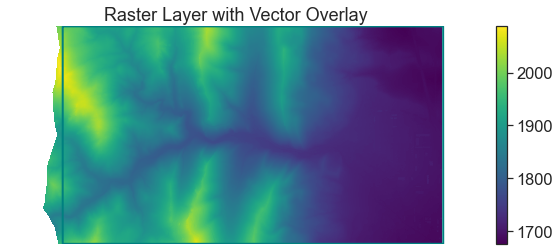

In [18]:
f, ax = plt.subplots(figsize=(11, 4))

dtm_pre_arr.plot.imshow(
    cmap="viridis",
    ax=ax,
)
site_bound_shp.plot(
    color='None',
    edgecolor='teal',
    linewidth=2,
    ax=ax,
    zorder=4,
)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()
